<a href="https://colab.research.google.com/github/alindote/MES/blob/exercicios/MES_exercicio6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

In [ ]:
# Set inital conditions
V = 0.1 # volume, in ml
k = 10 # /s
q1 = 0.001 # ml/s
q2 = 10 # /s
cA_0 = 5000  # molecules/ml
cE_0 = 10000 # molecules/ml

In [ ]:

# arrays for storing the evolution of each species
nA = np.array([cA_0*V])
nB = np.array([0])
nE = np.array([cE_0*V])
nAE = np.array([0])
print("Initial conditions: nA={}, nB={}, nE={}, nAE={}".format(nA[-1],nB[-1],nE[-1],nAE[-1]))

# array for storing reaction times
t = np.array([0])
# maximum time of the simulation
tmax = 10

# Time cycle
while t[-1] < tmax:
  # possible reactions
  RM = q1 * nA[-1] * nE[-1] / V # A+E -> AE     rate: q1*nA*nE / V
  RB1 = q2 * nAE[-1]            # AE  -> A + E  rate: q2*nAE
  RB2 = k * nAE[-1]             # AE  -> B + E  rate: κ*nAE
  # Total rate
  RT = RM + RB1 + RB2
  # Stop if we run out of reagents
  if RT == 0:
    print("No more reactions at t={} (nA={},nB={},nE={},nAE={})".format(t[-1],nA[-1],nB[-1],nE[-1],nAE[-1]))
    break

  dt = -np.log(rnd.rand())/RT   # sample time interval until next reaction

  # now choose which reaction happens
  reaction = rnd.rand()
  if reaction < (RM/RT):            # merge reaction, A+E -> AE
    nA = np.append(nA, nA[-1] - 1)  # A and E decrease, AE increases, no change in B
    nE = np.append(nE, nE[-1] - 1)
    nAE = np.append(nAE, nAE[-1] + 1)
    nB = np.append(nB, nB[-1])
  elif reaction < ((RM+RB1)/RT):    # breakup reaction #1: AE -> A + E
    nA = np.append(nA, nA[-1] + 1)  # A and E increase, AE decreases, no change in B
    nE = np.append(nE, nE[-1] + 1)
    nAE = np.append(nAE, nAE[-1] - 1)
    nB = np.append(nB, nB[-1])
  else:                             # breakup reaction #2: AE -> B + E
    nB = np.append(nB, nB[-1] + 1)  # B and E increase, AE decreases, no change in A
    nE = np.append(nE, nE[-1] + 1)
    nAE = np.append(nAE, nAE[-1] - 1)
    nA = np.append(nA, nA[-1])

  t = np.append(t, t[-1] + dt)   # acrescentamos o novo instante temporal

Initial conditions: nA=500.0, nB=0, nE=1000.0, nAE=0
No more reactions at t=1.4836039660775855 (nA=0.0,nB=500,nE=1000.0,nAE=0)


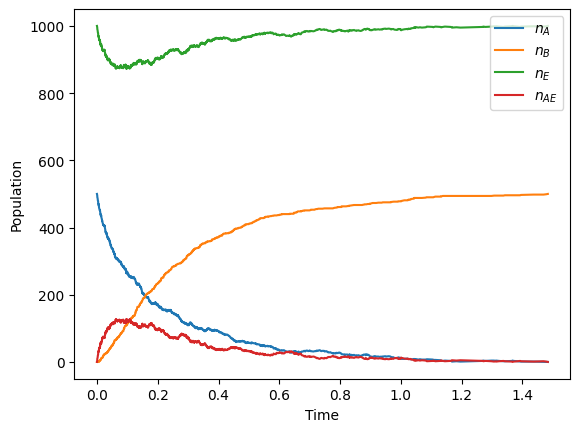

In [ ]:
# plot time evolution of each population
plt.figure()
plt.plot(t, nA, label='$n_A$')
plt.plot(t, nB, label='$n_B$')
plt.plot(t, nE, label='$n_E$')
plt.plot(t, nAE, label='$n_{AE}$')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()